In [2]:
import numpy as np
import tensorflow as tf
import keras
import numpy as np
import os
import seaborn as sns
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
from sklearn import metrics, preprocessing

import AAPutils
import utils

a)Carga de datos

In [68]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.reshape(1,-1)[0]
y_test = y_test.reshape(1,-1)[0]

b)Visualización

(32, 32, 3)

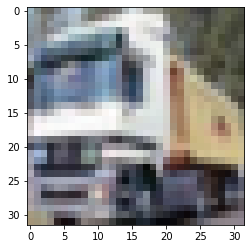

In [56]:
plt.imshow(X_train[1,:,:,:])
X_train[0].shape

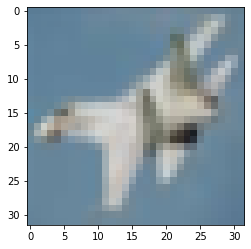

In [50]:
#Para ver la 9 imagen del conjunto de prueba:
plt.imshow(X_test[10, :, :, :])

Implementá un código que visualice 8 imágenes de cada clase en una grilla de 8x10. Utiliza la función subplots de matplotlib.pyplot para generar la grilla

In [95]:
# obtenemos 10 elementos de cada clase
selection = {}
keys = np.unique(y_train)
# 1 arreglo por cada clase, nos indica el indice
for i in keys:
    selection[i] = X_train[y_train==i][0:8,:,:,:]

np.unique(y_train).size

10

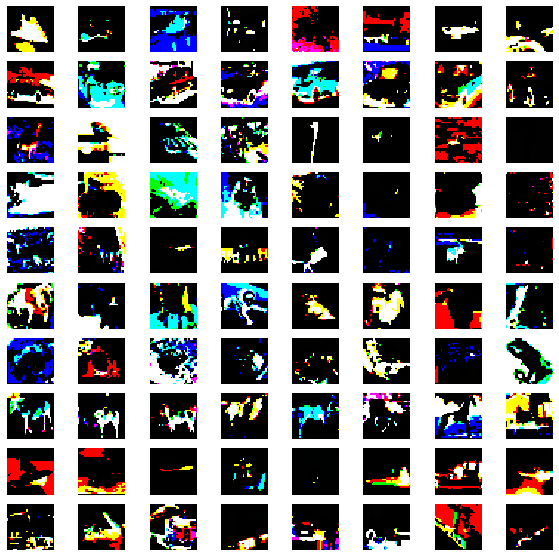

In [122]:
fig, axes = plt.subplots(10,8, figsize=(10,10))

for i in keys:
    for k in range(0,8):
        axes[i,k].imshow(selection[i][k])
        axes[i,k].axis('off')

3)Aplanamiento
La operación Flattense refiere a aplanar un arreglo n-dimensional, es decir, desarmar las estructuras de sus dimensiones y quedarse con todos los valores.

Como no se pierde ningún valor, sólo se reordenan, la nueva dimensión V tiene tamaño $784=H*V=28*28$

In [73]:
flatten_layer = keras.layers.Flatten(input_shape=X_train[0].shape)

d)Entrenamiento del modelo
Entrená  un  modelo  para  clasificar  las  imágenes,  utilizando  una  softmax  en  la  capa  de  salida  y  la entropía cruzada como función de error.  

In [134]:
classes = np.unique(y_train).size

layer1 = keras.layers.Dense(800, activation='relu')
layer2 = keras.layers.Dense(100, activation='relu')
layer3 = keras.layers.Dense(64, activation='tanh')
output = keras.layers.Dense(classes, activation='softmax')

model = keras.models.Sequential(
    [
        flatten_layer,
        layer1,
        layer2,
        layer3,
        output,
    ]
)

epochs = 1500
alpha = 0.001

model.compile(
#       optimizer= 'adam',
    optimizer = keras.optimizers.SGD(lr=alpha), 
    loss='sparse_categorical_crossentropy', 
      metrics=[
          'accuracy', 
      ], 
)

In [135]:
history = model.fit(
    X_train[:30000], 
    y_train[:30000], 
    epochs=epochs, 
    batch_size=64, 
    verbose=2, 
    callbacks = [
       keras.callbacks.EarlyStopping(
           monitor='val_loss', 
           patience=10,
           verbose=2, 
           mode='auto', 
           restore_best_weights=True
       )
    ],
    validation_data = (X_test, y_test),
    #class_weight = weight # acá va esto? o el de train?
)
model.summary()

Train on 30000 samples, validate on 10000 samples
Epoch 1/1500
 - 9s - loss: 2.2627 - accuracy: 0.1548 - val_loss: 2.1784 - val_accuracy: 0.1977
Epoch 2/1500
 - 9s - loss: 2.1273 - accuracy: 0.2278 - val_loss: 2.1065 - val_accuracy: 0.2335
Epoch 3/1500
 - 8s - loss: 2.0608 - accuracy: 0.2607 - val_loss: 2.0646 - val_accuracy: 0.2592
Epoch 4/1500
 - 8s - loss: 2.0161 - accuracy: 0.2828 - val_loss: 2.0347 - val_accuracy: 0.2732
Epoch 5/1500
 - 8s - loss: 1.9816 - accuracy: 0.2971 - val_loss: 2.0121 - val_accuracy: 0.2819
Epoch 6/1500
 - 8s - loss: 1.9533 - accuracy: 0.3082 - val_loss: 1.9941 - val_accuracy: 0.2922
Epoch 7/1500
 - 10s - loss: 1.9290 - accuracy: 0.3185 - val_loss: 1.9789 - val_accuracy: 0.2995
Epoch 8/1500
 - 12s - loss: 1.9072 - accuracy: 0.3277 - val_loss: 1.9663 - val_accuracy: 0.3034
Epoch 9/1500
 - 10s - loss: 1.8877 - accuracy: 0.3377 - val_loss: 1.9547 - val_accuracy: 0.3045
Epoch 10/1500
 - 8s - loss: 1.8696 - accuracy: 0.3457 - val_loss: 1.9437 - val_accuracy: 0.3

d)i) Medí el error y el accuracy en el conjunto de test (y el de train).   
Computá la matriz de confusión, pero antes de mirarla ¿qué pares de clases te parece que van a confundirse más?

In [141]:
print(metrics.classification_report(y_test, model.predict_classes(X_test)))

              precision    recall  f1-score   support

           0       0.34      0.48      0.39      1000
           1       0.46      0.49      0.47      1000
           2       0.26      0.27      0.26      1000
           3       0.28      0.23      0.25      1000
           4       0.25      0.22      0.23      1000
           5       0.32      0.23      0.26      1000
           6       0.40      0.41      0.41      1000
           7       0.38      0.38      0.38      1000
           8       0.47      0.48      0.48      1000
           9       0.39      0.41      0.40      1000

    accuracy                           0.36     10000
   macro avg       0.35      0.36      0.35     10000
weighted avg       0.35      0.36      0.35     10000



In [142]:
print(metrics.confusion_matrix(y_test, model.predict_classes(X_test)))

[[477  33 110  24  55  18  33  44 135  71]
 [ 54 489  23  33  19  15  45  37  59 226]
 [171  35 267  74 127  71  92  82  44  37]
 [ 77  48 103 226  79 150 112 105  38  62]
 [156  28 163  53 218  57 106 126  59  34]
 [ 87  33 128 166 113 225  89  82  43  34]
 [ 68  46  98  87  96  58 415  60  25  47]
 [ 70  45  89  66  95  93  72 377  34  59]
 [184  78  34  36  55   9  31  24 479  70]
 [ 72 229  20  32  29  15  49  54  95 405]]


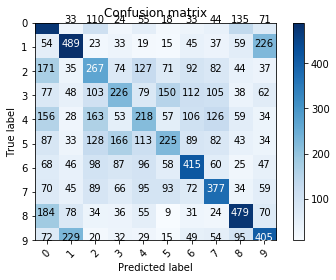

In [143]:
AAPutils.plot_confusion_matrix(y_test, model.predict_classes(X_test))

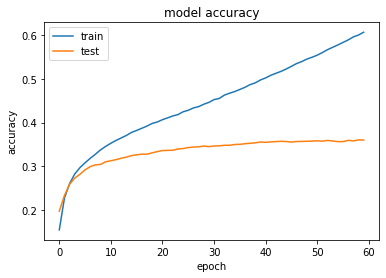

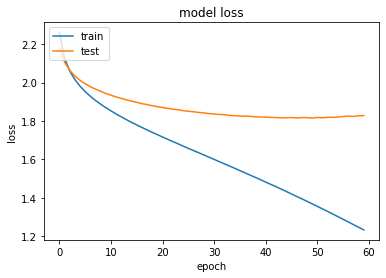

In [144]:
# AAPutils.plot_training_curves(history)
utils.plot_curve(history, "accuracy")
utils.plot_curve(history, "loss")

e)Normalización de las imágenes ( manopla y sklearn )

In [102]:
class Rescaler:
    def __init__(self):
        self.mean = 0
        self.std = 0
        self.fitted = False
        
    def fit(self, X):
        
        self.mean = X.mean()
        self.std = X.std()
        self.fitted = True
    
    def transform(self, X):
        if (not self.fitted):
            raise Exception('Debes ejecutar fit primero')
        return (X - self.mean) / self.std

In [103]:
scaler_r = Rescaler()
scaler_g = Rescaler()
scaler_b = Rescaler()

scaler_r.fit(X_train[:,:,:,0])
scaler_g.fit(X_train[:,:,:,1])
scaler_b.fit(X_train[:,:,:,2])

In [104]:
X_train[:,:,:,0] = scaler_r.transform(X_train[:,:,:,0])
X_train[:,:,:,1] = scaler_g.transform(X_train[:,:,:,1])
X_train[:,:,:,2] = scaler_b.transform(X_train[:,:,:,2])

X_test[:,:,:,0] = scaler_r.transform(X_test[:,:,:,0])
X_test[:,:,:,1] = scaler_g.transform(X_test[:,:,:,1])
X_test[:,:,:,2] = scaler_b.transform(X_test[:,:,:,2])


In [ ]:
classes = np.unique(y_train).size

layer1 = keras.layers.Dense(10, activation='relu')
output = keras.layers.Dense(classes, activation='softmax')

model = keras.models.Sequential(
    [
        flatten_layer,
        layer1,
        output,
    ]
)

epochs = 1500
alpha = 0.1
model.compile(
#   optimizer= 'adam',
    optimizer = keras.optimizers.SGD(lr=alpha), 
    loss='sparse_categorical_crossentropy', 
      metrics=[
          'accuracy', 
      ], 
)

# repetimos todo el proceso anterior en un solo paso: 
history = model.fit(
    X_train, 
    y_train, 
    epochs=epochs, 
    batch_size=32, 
    verbose=2, 
    callbacks = [
       keras.callbacks.EarlyStopping(
           monitor='val_loss', 
           patience=15,
           verbose=2, 
           mode='auto', 
           restore_best_weights=True
       )
    ],
    validation_data = (X_test, y_test),
    #class_weight = weight # acá va esto? o el de train?
)

model.summary()
print(metrics.classification_report(y_test, model.predict_classes(X_test)))
print(metrics.confusion_matrix(y_test, model.predict_classes(X_test)))
utils.plot_curve(history, "accuracy")
utils.plot_curve(history, "loss")